## Ames Housing Project 

### Purpose of Project 

This project uses a database of housing sales data from Ames, Iowa (go Cyclones!) from 2006 to 2010. The purpose of the project was to predict house sales using a variety of features related to the quality and physical attributes of the house. 

In this notebook, I examine the train and test datasets and decide how to deal with null values, as well as dummy code categorical variables. I concatenate both sets, deal with nulls and categoricals, and then split them back out again. 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import Image

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


Looking at .info for both test and train shows me there are several variables with a lot of Nulls, I will drop them from both datasets. Alley, Fireplace Qu, Pool QC, Fence, Misc Feature.

In addition, there are a couple variables that I think are the wrong datatype: Int and should be Object: 'MS Zoning', 'Mo Sold'. I will change these after I concatenate the two sets

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 82 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

Just randomly picking a categorical variable to see the unique variables and comparing the train and test database, I see that this variable, MS Zoning, has different categories. The test database does not have the 'A (agr)' value. So if I dummy code that variable separately in the test and train, I will end up with different number of dummy variables and columns. So, I'm going to have to concatenate the two datasets together, dummy code, and then split them out again. 

In [9]:
train['MS Zoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'], dtype=object)

In [10]:
test['MS Zoning'].unique()

array(['RM', 'RL', 'FV', 'RH', 'C (all)', 'I (all)'], dtype=object)

I'm planning to use train = pd.get_dummies(train) to dummy code all categorical variables - if you don't specify which columns, it defaults to all Object variables. Problem is, one of the possible target variables, Sale Condition, is also categorical, and I don't want to dummy code that one. So, before concatenating the two datasets, I'll encode the Sale Condition variable and change it to an INT type.  I'll change it back to object after I separate the datasets again. 

In [6]:
encoded_sale_condition = {
    'Normal': 0,
    'Abnorml': 1,
    'Partial': 0,
    'Family': 0,
    'Alloca': 0,
    'AdjLand': 0
}
train['EncodedSaleCondition'] = train["Sale Condition"].map(encoded_sale_condition)

In [7]:
train['Sale Condition'].value_counts()

Normal     1696
Partial     164
Abnorml     132
Family       29
Alloca       19
AdjLand      11
Name: Sale Condition, dtype: int64

In [8]:
#Looks like the encoding worked, keeping the 132 abnormal, and making everything else normal.
train['EncodedSaleCondition'].value_counts()

0    1919
1     132
Name: EncodedSaleCondition, dtype: int64

In [10]:
#figure out how to change back to an object
train['EncodedSaleCondition'].astype(int)

0       0
1       0
2       1
3       0
4       0
5       0
6       0
7       1
8       0
9       0
10      1
11      1
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2021    0
2022    0
2023    0
2024    0
2025    0
2026    0
2027    0
2028    0
2029    0
2030    1
2031    0
2032    0
2033    0
2034    0
2035    0
2036    0
2037    0
2038    0
2039    0
2040    0
2041    0
2042    1
2043    0
2044    0
2045    0
2046    0
2047    0
2048    0
2049    0
2050    0
Name: EncodedSaleCondition, Length: 2051, dtype: int64

Creating a new column in both datasets that will identify whether it is the test or train set, so that I can use that column to separate them back out again later. 

In [11]:
train['train_dataset'] = 1

In [12]:
train['train_dataset'].value_counts()

1    2051
Name: train_dataset, dtype: int64

In [13]:
test['test_dataset'] = 1

In [14]:
test['test_dataset'].value_counts()

1    879
Name: test_dataset, dtype: int64

### Concatenating Train and Test sets
I'm going to join the two datasets, do dummy coding and some other datacleaning on both sets and then separate them back out again. 

In [15]:
#code to concat both datasets
both = pd.concat([test, train])
both.shape

(2930, 85)

Double checking I still have the correct number of values for train_dataset and test_dataset.

In [16]:
both['train_dataset'].value_counts()

1.0    2051
Name: train_dataset, dtype: int64

In [17]:
both['test_dataset'].value_counts()

1.0    879
Name: test_dataset, dtype: int64

Dropping those variables that had lots of nulls. 

In [18]:
both.drop(['Alley', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature'], axis=1, inplace=True)

Changing two variables that are INT into Objects.

In [19]:
both['MS Zoning'].astype(object)
both['Mo Sold'].astype(object)

0        4
1        8
2        9
3        7
4        7
5        6
6        5
7       10
8        1
9        2
10       6
11       7
12       6
13      10
14       5
15       6
16       5
17       2
18       8
19      11
20       5
21       6
22       7
23      10
24       4
25       5
26       6
27       6
28       5
29       7
        ..
2021     3
2022    12
2023     6
2024    11
2025    11
2026    10
2027     9
2028     6
2029     5
2030     1
2031     4
2032     5
2033     3
2034     7
2035     7
2036     7
2037     6
2038     5
2039     5
2040     7
2041     3
2042     9
2043     2
2044     4
2045    11
2046     1
2047     3
2048     3
2049    11
2050     6
Name: Mo Sold, Length: 2930, dtype: object

Dummy coding all categorical variables - I see I now have 310 columns.

In [20]:
both = pd.get_dummies(both)
both.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Full Bath,Bsmt Half Bath,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,Enclosed Porch,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr
0,908,1020,0,4,0.0,0.0,1020.0,0.0,0.0,112,...,0,0,0,0,1,0,1,1,0,0
1,1967,0,0,6,0.0,0.0,1967.0,0.0,0.0,0,...,0,0,0,0,1,0,1,1,0,0
2,664,832,0,3,1.0,0.0,100.0,554.0,0.0,0,...,0,1,0,0,0,0,1,1,0,0
3,968,0,0,2,0.0,0.0,968.0,0.0,0.0,184,...,0,0,0,0,1,0,1,1,0,0
4,1394,0,0,3,1.0,0.0,785.0,609.0,0.0,0,...,0,0,0,0,1,0,1,1,0,0


In [21]:
#Encoded Sale Condition was not dummy coded
both['EncodedSaleCondition'].value_counts()

0.0    1919
1.0     132
Name: EncodedSaleCondition, dtype: int64

Based on the data dictionary, I'll impute null values of integer and float variables like this: 

Mean: Lot Frontage, Mas Vnr Area, BasmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Garage Area

Median: Bsmt Full Bath, Bsmt Half Bath, Garage Yr Blt, Garage Cars

In [22]:
#Code to replace numerical null values with either mean or mode:
both['Lot Frontage'].fillna((both['Lot Frontage'].mean()), inplace=True)
both['Mas Vnr Area'].fillna((both['Mas Vnr Area'].mean()), inplace=True)
both['BsmtFin SF 1'].fillna((both['BsmtFin SF 1'].mean()), inplace=True)
both['BsmtFin SF 2'].fillna((both['BsmtFin SF 2'].mean()), inplace=True)
both['Bsmt Unf SF'].fillna((both['Bsmt Unf SF'].mean()), inplace=True)
both['Total Bsmt SF'].fillna((both['Total Bsmt SF'].mean()), inplace=True)
both['Garage Area'].fillna((both['Garage Area'].mean()), inplace=True)

both['Bsmt Full Bath'].fillna((both['Bsmt Full Bath'].median()), inplace=True)
both['Bsmt Half Bath'].fillna((both['Bsmt Half Bath'].median()), inplace=True)
both['Garage Yr Blt'].fillna((both['Garage Yr Blt'].median()), inplace=True)
both['Garage Cars'].fillna((both['Garage Cars'].median()), inplace=True)

In [23]:
#picking one to make sure it worked
both['Bsmt Full Bath'].value_counts()

0.0    1709
1.0    1181
2.0      38
3.0       2
Name: Bsmt Full Bath, dtype: int64

## Separating Train and Test again
That's all I wanted to accomplish with both datasets together, so now I'll separate them again and do some feature selection with the train dataset. 

In [24]:
train = both[both['train_dataset'] == 1]

In [25]:
test = both[both['test_dataset'] == 1]

In [26]:
train.shape

(2051, 290)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Columns: 290 entries, 1st Flr SF to Utilities_NoSewr
dtypes: float64(15), int64(27), uint8(248)
memory usage: 1.2 MB


In [28]:
test.shape

(879, 290)

Since I had joined the two sets, the test set now has columsn for Sale Price and Encoded Sale Condition, as well as the train_dataset and test_dataset columns, so I'll drop those. 

In [29]:
test.drop(['EncodedSaleCondition', 'SalePrice', 'test_dataset', 'train_dataset'], axis=1, inplace=True)

/Users/Morgan2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
#now I see those four columns are gone.
test.shape

(879, 286)

In [32]:
#Saving the new test dataset to a different csv
test.to_csv('test_for_reg_and_class.csv', index=False)

Need to drop two columns from the train set: 

In [33]:
train.drop(['test_dataset', 'train_dataset'], axis=1, inplace=True)

/Users/Morgan2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
train.shape

(2051, 288)

In [35]:
train.to_csv('train_for_reg_and_class.csv', index=False)

### A Bit of Exporation 

I see I have some outliers - the ones that concern me now are in my target variable, Sale Price. I may need to either drop, or figure out how to transform that variable. 

{'boxes': [<matplotlib.lines.Line2D at 0x10b21e7f0>],
 'caps': [<matplotlib.lines.Line2D at 0x10b249240>,
 'fliers': [<matplotlib.lines.Line2D at 0x10b249eb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10b249a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10b21e940>,
  <matplotlib.lines.Line2D at 0x10b21edd8>]}

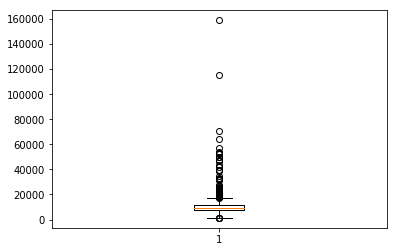

In [36]:
plt.boxplot(train["Lot Area"])

(array([  8.,  34., 135., 390., 460., 358., 210., 140., 104.,  64.,  56.,
         23.,  24.,  16.,  10.,   6.,   3.,   3.,   3.,   4.]),
 array([ 12789. ,  42732.4,  72675.8, 102619.2, 132562.6, 162506. ,
        192449.4, 222392.8, 252336.2, 282279.6, 312223. , 342166.4,
        372109.8, 402053.2, 431996.6, 461940. , 491883.4, 521826.8,
        551770.2, 581713.6, 611657. ]),
 <a list of 20 Patch objects>)

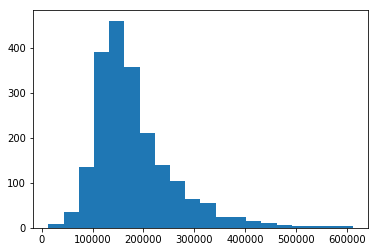

In [37]:
plt.hist(train['SalePrice'], bins = 20)

This plot shows an expected relationship between great room living area and sale price. Some homes do not have a 2nd story, so there are null values at 0. The dark green circles are homes whose condition is "Abnormal," and most of those seem to be at lower house price levels. That makes sense. 

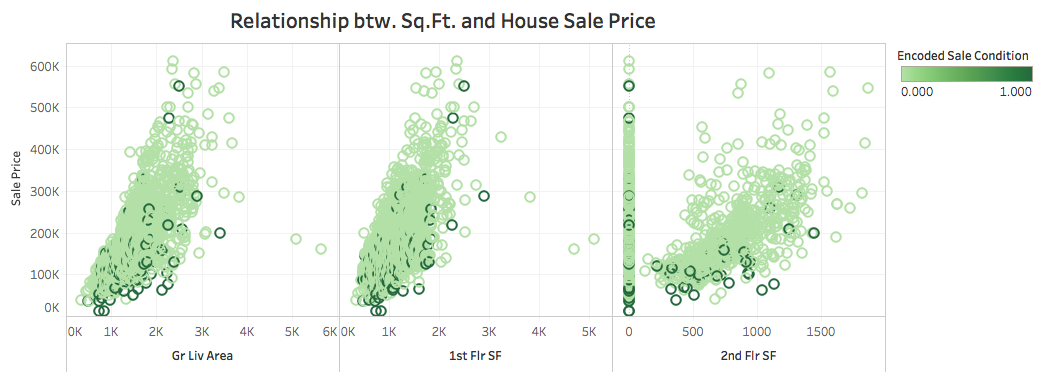

In [9]:
Image(filename='./SqFtandHousePrice.png')

Variables related to square footage and quality are most highly correlated with sale price. Makes sense. I'll choose these variables to play with some regression models in the next notebook. 

In [42]:
train.corr()[['SalePrice']].abs().sort_values('SalePrice', ascending=False).head(20)

,SalePrice
SalePrice,1.000000
Overall Qual,0.800207
Gr Liv Area,0.697038
Garage Area,0.650247
Garage Cars,0.648128
Total Bsmt SF,0.628677
1st Flr SF,0.618486
Exter Qual_TA,0.600362
Bsmt Qual_Ex,0.586497
Year Built,0.571849
